In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
print(len(mnist.train.images[0]))
print(len(mnist.train.labels[0]))

784
10


In [20]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)


(55000, 784)
(55000, 10)


In [21]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


In [23]:
print(mnist.validation.labels.shape)

(5000, 10)


In [90]:
# (mnist.train.images[1].reshape(-1,28,28,1)[0])


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

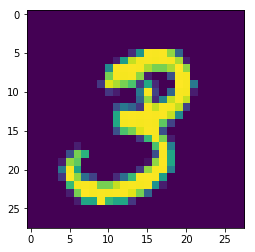

In [30]:
plt.imshow(mnist.train.images[1].reshape(28,28))

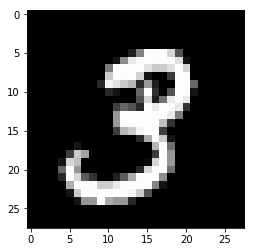

In [31]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [46]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(init_random_dist)

In [92]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,shape = shape)
    return tf.Variable(init_bias_vals)

In [62]:
# var = init_weights([2,2,2,2])

In [67]:
# init = tf.global_variables_initializer()
# with tf.Session() as sess:
#     init.run()
#     print(sess.run(var))

In [69]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding='SAME')

In [71]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1],
                             strides = [1,2,2,1],padding ='SAME')
    

In [94]:
def convolutional_layer(input_x,shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [106]:
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,W)+b

PLACEHOLDERS

In [74]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [75]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

LAYERS

In [77]:
x_images = tf.reshape(x,[-1,28,28,1])

In [98]:
convo_1 = convolutional_layer(x_images,shape = [6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1) 

In [99]:
convo_2 = convolutional_layer(convo_1_pooling,shape = [6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2) 

In [107]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [110]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [111]:
y_pred = normal_full_layer(full_one_dropout,10)

In [113]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [114]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [115]:
init = tf.global_variables_initializer()

In [ ]:
steps = 5000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.0456


Currently on step 100
Accuracy is:
0.8382


Currently on step 200
Accuracy is:
0.9088


Currently on step 300
Accuracy is:
0.924


Currently on step 400
Accuracy is:
0.9345


Currently on step 500
Accuracy is:
0.9474


Currently on step 600
Accuracy is:
0.9522


Currently on step 700
Accuracy is:
0.9553


Currently on step 800
Accuracy is:
0.9604


Currently on step 900
Accuracy is:
0.9626


Currently on step 1000
Accuracy is:
0.9647


Currently on step 1100
Accuracy is:
0.9662


Currently on step 1200
Accuracy is:
0.9639


Currently on step 1300
Accuracy is:
0.9701


Currently on step 1400
Accuracy is:
0.9692


Currently on step 1500
Accuracy is:
0.9709


Currently on step 1600
Accuracy is:
0.9706


Currently on step 1700
Accuracy is:
0.9729


Currently on step 1800
Accuracy is:
0.9745


Currently on step 1900
Accuracy is:
0.9718


Currently on step 2000
Accuracy is:
0.9755


Currently on step 2100
Accuracy is:
0.9774


Currently on step 2200
